# PIP Exercise -2

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import yfinance as yf

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Extracting data

In [2]:
# Set the start and end dates for the data
start_date = '2021-01-01'
end_date = '2023-06-21'
# extracting data from yfinance
Apple_df = yf.download('AAPL', start=start_date, end=end_date)
Google_df = yf.download('GOOGL', start=start_date, end=end_date)
Tesla_df = yf.download('TSLA', start=start_date, end=end_date)
IBM_df = yf.download('IBM', start=start_date, end=end_date)
Microsoft_df = yf.download('MSFT', start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# resetting index
Apple_df.reset_index(inplace=True)
Google_df.reset_index(inplace=True)
Tesla_df.reset_index(inplace=True)
IBM_df.reset_index(inplace=True)
Microsoft_df.reset_index(inplace=True)

In [4]:
# assign a columns 'company'
Apple_df['Company'] = ['Apple']*len(Apple_df)
Google_df['Company'] = ['Google']*len(Google_df)
Tesla_df['Company'] = ['Tesla']*len(Tesla_df)
IBM_df['Company'] = ['IBM']*len(IBM_df)
Microsoft_df['Company'] = ['Microsoft']*len(Microsoft_df)

In [5]:
# appending all data making a final df
df = pd.concat([Apple_df,Google_df,Tesla_df,IBM_df,Microsoft_df],axis=0)


In [6]:
#printing first five rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,127.503632,143301900,Apple
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,129.080078,97664900,Apple
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,124.735023,155088000,Apple
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,128.991394,109578200,Apple
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,130.104752,105158200,Apple


In [7]:
#checking the diamension of the df
df.shape

(3095, 8)

In [8]:
#checking no of companies data which we have 
df['Company'].unique()

array(['Apple', 'Google', 'Tesla', 'IBM', 'Microsoft'], dtype=object)

## We have data of these companies 'Apple', 'Google', 'Tesla', 'IBM', 'Microsoft'

# I. Which company has the highest revenue?

In [9]:
# calculating revenue
df['Revenue'] = df['Close']*df['Volume']

In [10]:
High_rev = df.groupby('Company').agg({'Revenue':sum}).reset_index().sort_values('Revenue',ascending=False)

In [11]:
High_rev

,Company,Revenue
4,Tesla,1.421392e+13
0,Apple,7.786492e+12
3,Microsoft,4.902980e+12
1,Google,2.399484e+12
2,IBM,4.193265e+11


# Tesla has the highest revenue

# II. Which company has the highest market capitalization?

In [12]:
# calculating market capitalization
df['Market_capitalization'] = df['Close']*df['Volume'].mean()

In [13]:
High_Mark_cap = df.groupby('Company').agg({'Market_capitalization':sum}).reset_index().sort_values('Market_capitalization',ascending=False)
High_Mark_cap

,Company,Market_capitalization
3,Microsoft,8.484665e+12
4,Tesla,7.640351e+12
0,Apple,4.644633e+12
2,IBM,4.066221e+12
1,Google,3.613632e+12


## Microsoft has the highest market capitalization

# III. Which company has the highest earnings per share?

In [14]:
High_rev['EPS'] = High_rev['Revenue']/df['Revenue'].sum()

In [15]:
High_rev

,Company,Revenue,EPS
4,Tesla,1.421392e+13,0.478226
0,Apple,7.786492e+12,0.261976
3,Microsoft,4.902980e+12,0.164960
1,Google,2.399484e+12,0.080730
2,IBM,4.193265e+11,0.014108


## Tesla has the highest earnings per share

# IV. How has the performance of each company changed over time?

In [16]:
x = df.groupby(['Date','Company']).agg({'Revenue':'sum'}).reset_index()

In [17]:
x['Company'].unique()

array(['Apple', 'Google', 'IBM', 'Microsoft', 'Tesla'], dtype=object)

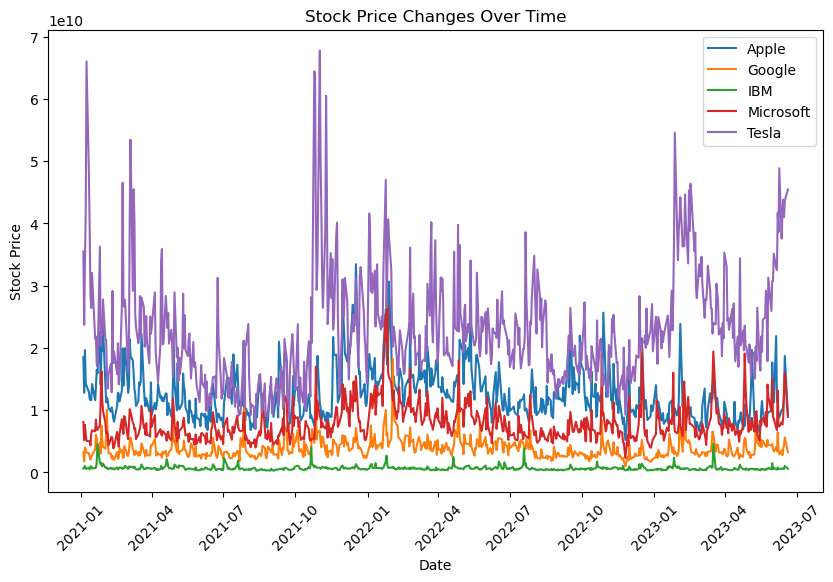

In [18]:
plt.figure(figsize=(10, 6))
for company in x['Company'].unique():
    data = x[x['Company'] == company]
    plt.plot(data['Date'], data['Revenue'], label=company)  # Include the label parameter

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Changes Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# V. Find the trends in the stock prices of these companies?

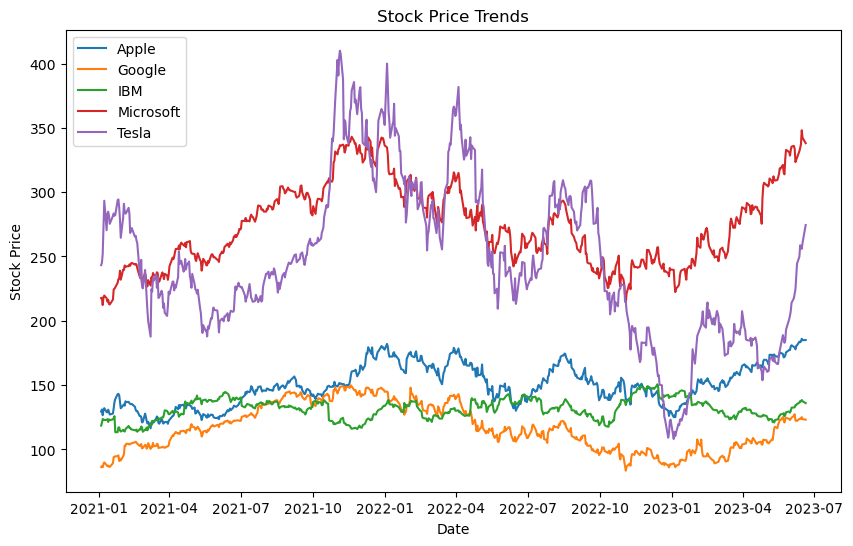

In [19]:

# Group the DataFrame by 'Company' and get the average 'Close' price for each company
company_prices = df.groupby('Company')['Close'].sum().reset_index()

# Plot the stock price trends for each company
plt.figure(figsize=(10, 6))
for company in company_prices['Company']:
    data = df[df['Company'] == company]
    plt.plot(data['Date'], data['Close'], label=company)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Trends')
plt.legend()
plt.xticks(rotation=1)
plt.show()
